In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from patternly.detection import AnomalyDetection

data = pd.read_csv("./data1", low_memory=False)
seqs = pd.concat(
    [data[(1000 * i):(1000 * (i + 1))].reset_index(drop=True) for i in range(int(data.shape[0]/1000))], 
    axis=1
)
seqs = seqs.T
seqs.index = range(seqs.shape[0])
seqs

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,1,0,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,1,0,1
1,0,1,0,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
3,1,0,1,0,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,1,1
4,0,1,0,0,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
236,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
237,1,0,1,0,1,0,1,1,0,1,...,0,1,1,0,0,1,0,1,1,0
238,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0


In [2]:
kmeans = KMeans(n_clusters=4)
pipeline = AnomalyDetection(anomaly_sensitivity=2, clustering_alg=kmeans, quantize=False, eps=0.1, verbose=True)
pipeline.fit(seqs)

predictions = pd.DataFrame(pipeline.predict())
anomalies = predictions[predictions[0] == True]
anomalies
print(list(anomalies.index))

Calculating distance matrix...
Clustering distance matrix...
Writing cluster 1/4 to file...
Writing cluster 2/4 to file...
Writing cluster 3/4 to file...
Writing cluster 4/4 to file...
Generating cluster PFSA 1/4...
Generating cluster PFSA 2/4...
Generating cluster PFSA 3/4...
Generating cluster PFSA 4/4...
Calculating cluster PFSA means and stds...
[]


In [3]:
pipeline.predict(seqs.iloc[239], clean=False)

False

In [4]:
pipeline.closest_match

array([2])

In [5]:
pipeline.curr_cluster_llk_vec[0]

array([0.72921994])

In [24]:
from IPython.display import Image, display
from IPython.core.display import HTML
for i, file in enumerate(pipeline.dot_files):
    print(f"Cluster {i} PFSA")
    display(Image(url=f"{file}.png", width=300))

Cluster 0 PFSA


Cluster 1 PFSA


Cluster 2 PFSA


Cluster 3 PFSA


TypeError: Image data of dtype <U55 cannot be converted to float

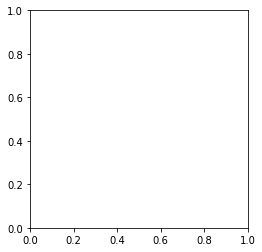

In [13]:
import matplotlib.pyplot as plt

for file in pipeline.dot_files:
    plt.figure()
    plt.imshow(f"{file}.png")